### 날짜, 기관순매매 , 외국인순매매, 외국인보유 주식수, 외국인 보유율

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

stockCode = '065450' #주식 코드 입력 | 빅텍 065450
page = '1' #주식 페이지 1 ~ ???

url = f'https://finance.naver.com/item/frgn.nhn?code={stockCode}&page={page}'

try:
    response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
    response.raise_for_status()  

    soup = BeautifulSoup(response.text, 'html.parser')
    data_table = soup.find('table', summary='외국인 기관 순매매 거래량에 관한표이며 날짜별로 정보를 제공합니다.')
    rows = data_table.find_all('tr')

    data = []
    for row in rows[3:]:
        columns = row.find_all('td', class_='num')
        if len(columns) >= 8:
            date = row.find('td', class_='tc').text.strip()
            institution_dealing = columns[4].text.strip()
            foreign_dealing = columns[5].text.strip()
            foreign_owned_volume = columns[6].text.strip()
            foreign_owned_rate = columns[7].text.strip()

            data.append([date, institution_dealing, foreign_dealing, foreign_owned_volume, foreign_owned_rate])

    df = pd.DataFrame(data, columns=['날짜', '기관순매매', '외국인 인순매매', '외국인 보유 주식수', '외국인 보유율'])
    
except requests.exceptions.RequestException as e:
    print('An error occurred during the request:', e)

df    

,날짜,기관순매매,외국인 인순매매,외국인 보유 주식수,외국인 보유율
0,2023.05.26,0,"-129,810","816,559",2.85%
1,2023.05.25,-1,"+33,593","946,369",3.30%
2,2023.05.24,-3,"+10,055","912,776",3.19%
3,2023.05.23,-5,"+61,418","902,721",3.15%
4,2023.05.22,-201,"+141,409","841,303",2.94%
5,2023.05.19,+180,"+55,595","699,894",2.44%
6,2023.05.18,-19,"+192,129","644,299",2.25%
7,2023.05.17,-28,"+65,429","452,170",1.58%
8,2023.05.16,"-2,126","-14,515","386,741",1.35%
9,2023.05.15,0,"+15,453","401,256",1.40%


## 외국인ㆍ기관 순매매 거래량
> 날짜 , 종가 , 전일비 , 등락률 , 거래량 , 기관순매매 , 외국인 인순매매, 외국인 보유 주식수, 외국인 보유율

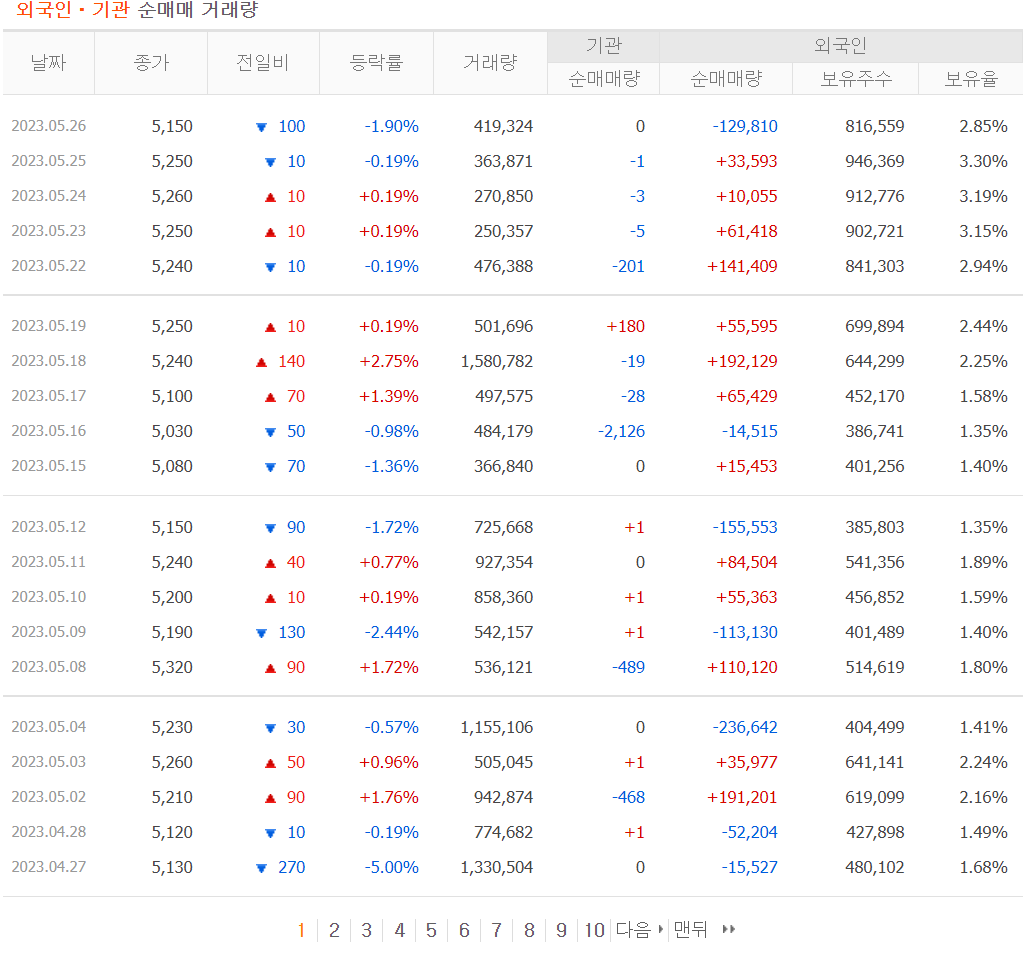

### - 목차 -
1. StockCode와 Page 변수에 주식 코드와 페이지 번호를 입력
2. Url 변수에 외국인 및 기관 매매 동향 데이터 페이지의 URL을 동적으로 생성
3. Requests 패키지를 사용하여 해당 URL에 GET 요청
4. 응답을 받아오고, HTML을 파싱하여 원하는 데이터를 추출
5. 추출한 데이터를 리스트에 저장하고, 해당 리스트를 pandas DataFrame으로 변환

In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

#사용자 설정 필요
stockCode = '065450' #주식 코드 입력
page = '1' #주식 페이지 1 ~ ???

url = f'https://finance.naver.com/item/frgn.nhn?code={stockCode}&page={page}'


try:
    response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
    response.raise_for_status() 

    soup = BeautifulSoup(response.text, 'html.parser')
    data_table = soup.find('table', summary='외국인 기관 순매매 거래량에 관한표이며 날짜별로 정보를 제공합니다.')
    rows = data_table.find_all('tr')

    data = []
    
    for row in rows[3:]:
        columns = row.find_all('td', class_='num')
        if len(columns) >= 8:
            date = row.find('td', class_='tc').text.strip() #날짜
            closing_price = columns[0].text.strip() # 종가
            daily_change = columns[1].text.strip() #전일비
            fluctuation_rate = columns[2].text.strip() #등락률
            trading_valume = columns[3].text.strip() #거래량
            institution_dealing = columns[4].text.strip() #기관 순매매량
            foreign_dealing = columns[5].text.strip() # 외국인 순매매량
            foreign_owned_volume = columns[6].text.strip() #외국인 보유주수
            foreign_owned_rate = columns[7].text.strip() #외국인 보유율

            data.append([date,closing_price,daily_change ,fluctuation_rate,trading_valume,
                         institution_dealing, foreign_dealing, foreign_owned_volume, foreign_owned_rate])
            
    df = pd.DataFrame(data, columns=['날짜','종가','전일비','등락률','거래량','기관순매매',
                                     '외국인 인순매매', '외국인 보유 주식수', '외국인 보유율'])


except requests.exceptions.RequestException as e:
    print('An error occurred during the request:', e)

df

,날짜,종가,전일비,등락률,거래량,기관순매매,외국인 인순매매,외국인 보유 주식수,외국인 보유율
0,2023.05.26,"5,150",100,-1.90%,"419,324",0,"-129,810","816,559",2.85%
1,2023.05.25,"5,250",10,-0.19%,"363,871",-1,"+33,593","946,369",3.30%
2,2023.05.24,"5,260",10,+0.19%,"270,850",-3,"+10,055","912,776",3.19%
3,2023.05.23,"5,250",10,+0.19%,"250,357",-5,"+61,418","902,721",3.15%
4,2023.05.22,"5,240",10,-0.19%,"476,388",-201,"+141,409","841,303",2.94%
5,2023.05.19,"5,250",10,+0.19%,"501,696",+180,"+55,595","699,894",2.44%
6,2023.05.18,"5,240",140,+2.75%,"1,580,782",-19,"+192,129","644,299",2.25%
7,2023.05.17,"5,100",70,+1.39%,"497,575",-28,"+65,429","452,170",1.58%
8,2023.05.16,"5,030",50,-0.98%,"484,179","-2,126","-14,515","386,741",1.35%
9,2023.05.15,"5,080",70,-1.36%,"366,840",0,"+15,453","401,256",1.40%


### 저장위치 :  내PC > 로컬 디스크(C:) > 사용자 > 

In [50]:
df.to_csv('./2023.05.26_04.27.csv')